<a href="https://colab.research.google.com/github/canerskrc/Veri_Bilimi_TechCareer_Pendik/blob/main/14_12_2024_RF_KodUygulama_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:

file_path = 'heart.csv'
data=pd.read_csv(file_path)

In [5]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for column in categorical_columns:
  le= LabelEncoder()
  data[column] = le.fit_transform(data[column])


In [6]:
X = data.drop(columns=['HeartDisease'])
y= data['HeartDisease']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)


In [8]:

rf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [9]:
y_pred=rf.predict(X_test)

Model Doğruluğu: 0.89

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       112
           1       0.91      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.89      0.89       276



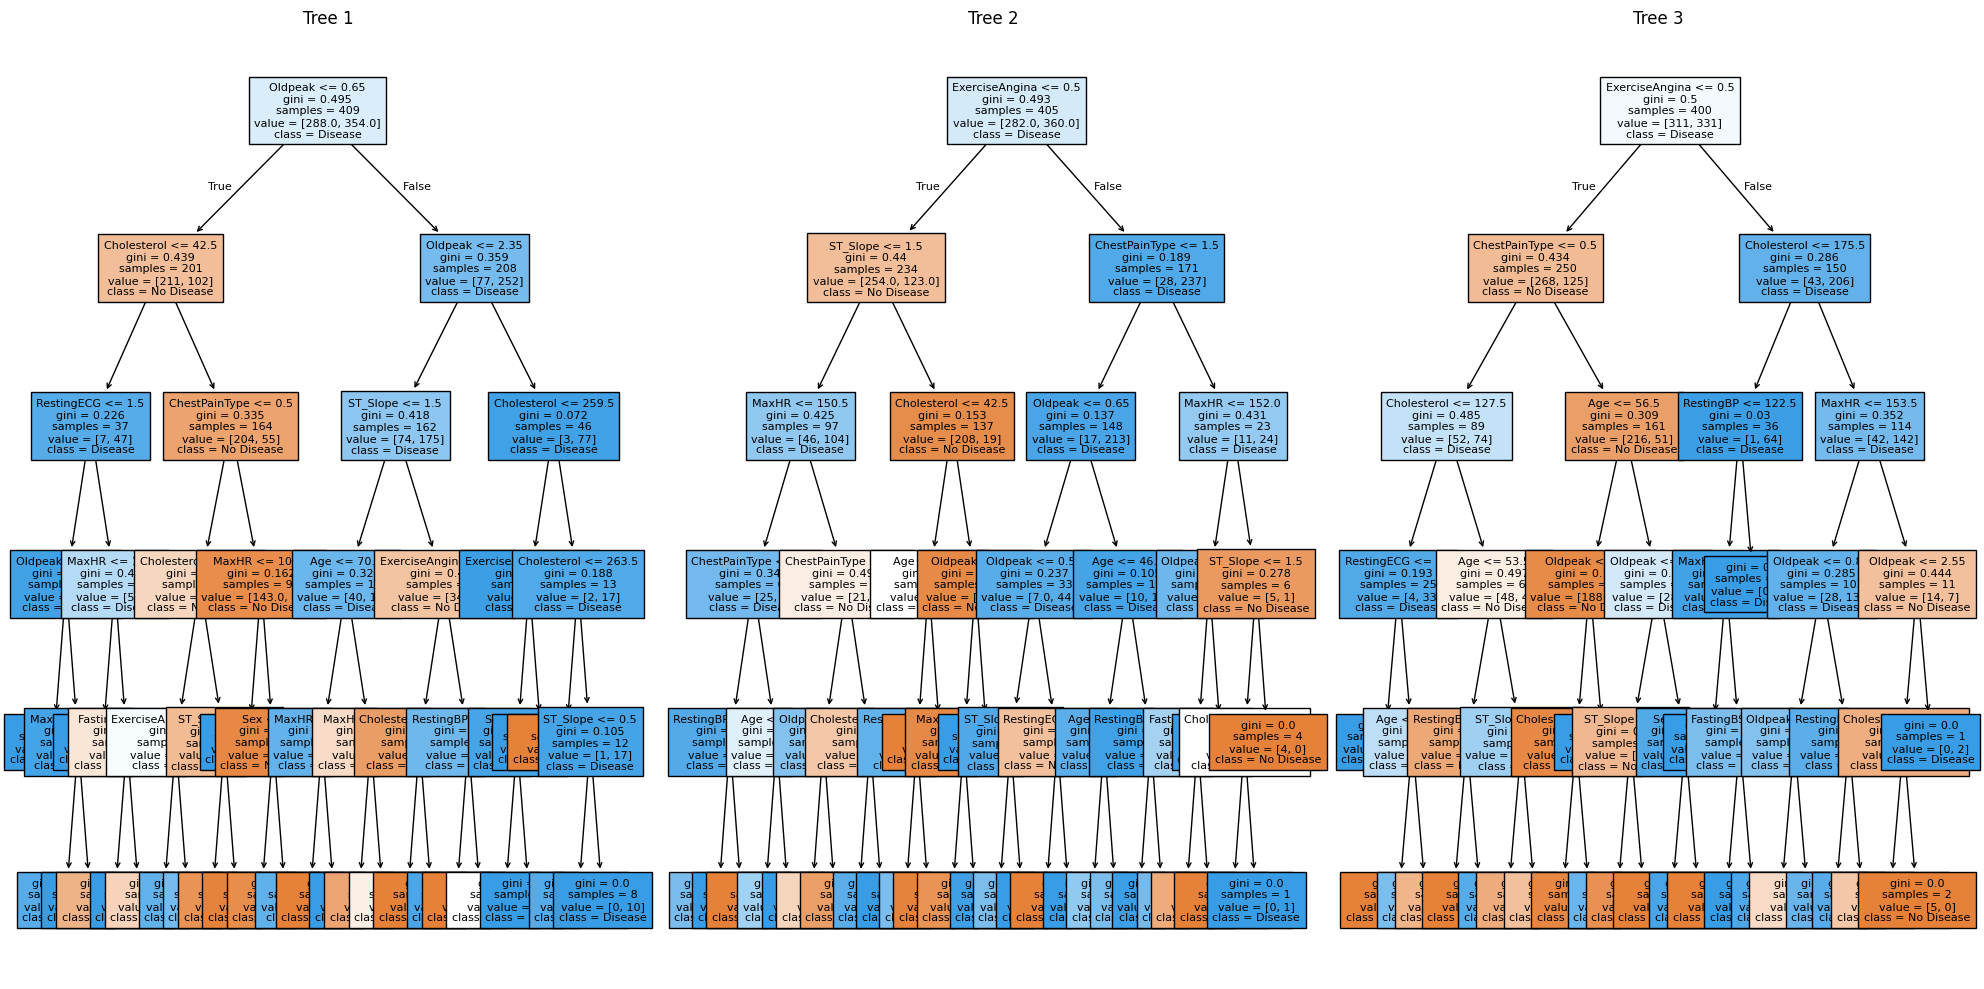

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
for i in range(min(3, len(rf.estimators_))):
  plt.subplot(1,3,i+1)
  plot_tree(rf.estimators_[i],feature_names=X.columns, class_names=['No Disease','Disease'],filled=True, fontsize=8)
  plt.title(f'Tree { i+1 }')
plt.tight_layout()
plt.show()